<a href="https://colab.research.google.com/github/myrronaguila/analyze_sqc/blob/main/Plots/IQ_Blob_Analysis_Part_1_Photon_Calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IQ Blob Analysis of Flux Tunable Qubits: Part 1 - Calibration
by Myrron Albert Callera Aguila (20231122)

This notebook calibrate single-shot readout of qubit states in the $IQ$ cloud from DAC voltages to units of photon number $n$. This standard operating procedure is useful in quantifying the SNR of the readout while ignoring the systematics in the measurement. The SNR is an important ingredient when making an error-budget for improving the readout fidelity.

## 0. Context

Qubit states are typically characterized by performing single-shot readout. In this scheme, the state of the qubit is probed at a particular frequency in time domain, and the researcher applies multiple shots of waveform until gaussian blobs can be characterized. This single-shot readout requires a parametric amplifier (PA) to resolve the noise, as shown in the figure below [1]. When using the PA, the ideal limitting noise should originate from vacuum noise. However, added noise come in due to the imperfections of the readout [i.e. imperfections of the non-ideal readout amplifier, lossy cables and connectors due to impedance mismatch, light tightness of the amplifier, bad wirebonding, etc]. Readout noise mitigation requires good diagnostics to identify sources of readout noise that could compromise the signal-to-noise ratio (SNR) of the readout line.

In principle, one should only see one qubit state, in a form of Gaussian blob in the IQ cloud, when applying single-shot measurement for qubits in the ground state at low readout photon counts. However, real qubits often suffer from higher state leakage due to imperfect thermalization wherein the |1> state and higher state gets thermally excited. As a rule of thumb, qubit temperatures below 30-40 mK are good enough to live by for a quantum computer. Proper discrimination between |0> and |1> often requires a parametric amplifier to separate out qubit states.

##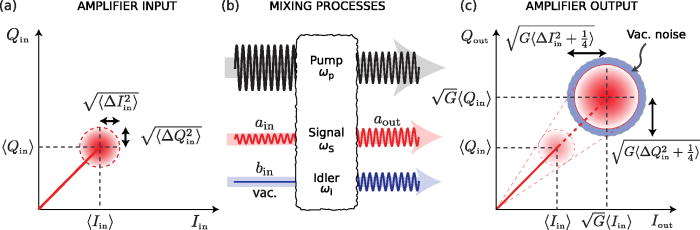

One must fully characterize the resonator and qubit frequencies before performing photon number calibration, especially for flux-tunable qubits.

In terms of hardware specifications, special care must be given on magnetic shielding before performing calibration. Flux-tunable qubits are susceptible to flux-offset. This event can be minimized with mu-metal shield with an external magnetic field assembly (i.e. cryoperm can, aluminum shield, etc). However, one cannot neglect trapped magnetic flux on chip, and one must have compensation method to perform this protocol.

For beginners, we list the following protocols for characterizing the qubit before we start the photon calibration.

[1] Observing Dispersive Shift at varying readout powers $P_{RO}$. (Identify the cavity frequency at the dispersive limit $\omega_{c}$.)

[2] Observing flux-dependent cavity shift $\omega_{c}(V_{flux})$ to observe qubit-cavity minimum and maximum cavity sweet spots ($\omega_{c,min}=\omega_{c}(V_{flux}+V_{flux,period}/2)$ and $\omega_{c,max}=\omega_{c}(V_{flux})$, determining the rough qubit period, $V_{flux,period}$).

[3] Two-tone spectroscopy: Tuning the qubit frequency at constant readout power $P_{xy}$ and constant XY driving power $P_{xy}$ to find the coarse qubit transition frequency $\omega_{01}$

[4] Two-tone spectroscopy: vary $P_{xy}$ to find $\omega_{01}$, $\omega_{02/2}$, and $\omega_{21}$ to verify the qubit anharmonicity $\alpha=\omega_{01}-\omega_{21}=-E_{c}$

[5] Two-tone spectroscopy: perform AC stark shift on the first and second transition frequencies $\omega_{01}(P_{RO})$ and $\omega_{21}(P_{RO})$ to define a fine $\omega_{01}$ and $\omega_{21}$ just above the frequency shift saturation.

[6] Two-tone spectroscopy: vary $\omega_{01}(V_{flux})$ and $\omega_{21}(V_{flux})$ to track the idle qubit transition frequencies at $V_{flux}$.

While one can use the transition frequencies $\omega_{01}$ and $\omega_{21}$ to drive the qubit to $|1\rangle$, and $|2\rangle$ states, finer driving of different qubit states can be achieved by probing into time domain measurements.

Here, we measure the Rabi frequency to determine precisely $f_{xy}$ that identifies $| 0 \rangle$, $| 1 \rangle$, and $| 2 \rangle$ in the IQ space. One can tune the readout power in the IQ space until the IQ blobs between $|0\rangle$ and $|1\rangle$ states become distorted. This power can then be identified roughly as $P_{crit}$.

Once $f_{xy,|0\rangle}$, $f_{xy,|1\rangle}$, and $f_{xy,|2\rangle}$ are identified, we have more than enough information needed to perform the calibration.   

## 1. Measuring accurate dispersive shifts of the qubit at different qubit states

The previous protocols serves to identify appropriate parameters to resolve dispersive shifts such as the detuning between the cavity and the qubit $\Delta=\omega_{01}-\omega_{c,|0\rangle}(V_{flux,offs})$. Here, we adopt the methodology of [2] for precise calibration of the coupling strength $g$. We reperform the dispersive shift with known $P_{RO}$ but now with appropriate driving of the qubit to the $|0\rangle$, $|1\rangle$ and $|2\rangle$. These serves to calibrate the coupling strength the dispersive shift $\chi$ by
$$2\chi=\omega_{c,|0\rangle}-\omega_{c,|1\rangle}$$.

The coupling strength of the resonator $g$ can be written as

$$g = \sqrt{-\chi \Delta \left(1+ \Delta/ \eta \right) }$$

where $\Delta=\omega_{10} - \omega_{r,|0\rangle}$, is the qubit-resonator detuning, and $\nu= \omega_{21} - \omega_{10} = -E_{c}/\hbar$.

After getting $\chi$, the coupling strength $g$ can be listed as follows. The published data of the measurement is based is shown in the Figure below.

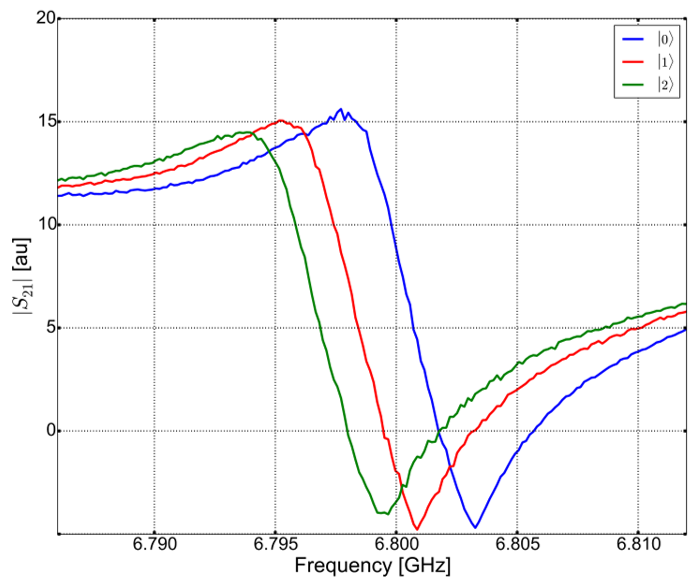

Figure in courtesy of [2] in Figure 6.2, page 142

Caption: Transmission through the measurement circuit for three qubit states.
Asymmetry in the resonance dips comes from impedance mismatch in the input and
output of the measurement circuit.

## Converting qubit frequency to resonator photons in time without attenuation estimates

We are now interested in determining the resonator photon leakage rate $\kappa_{r}$ in time domain, and in converting known photons based on time domain measurement. The resonator shifts the qubit frequency by
$$ \delta \omega_{01}=-2\chi n(t) $$ where $n$ is the number of photons. The dependence of qubit frequency to $n$, a measure of the decay time of $\delta \omega_{01}$ yields a time constant for $n(t)$, which is $1/\kappa_{r}$. This can be measured in a resonator ringdown technique as shown below.   

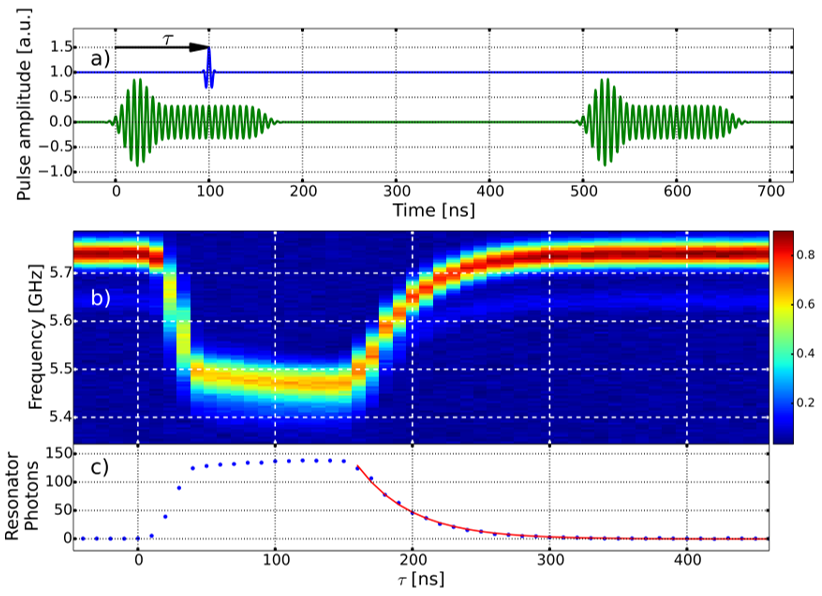

Figure in courtesy of [2] in Figure 6.3, page 145

Caption: Resonator photon occupation during the measurement pulse. a) The
control sequence applied to the I port of the IQ mixer used to control the resonator
and qubit. We apply two measurement pulses (green) to the resonator. Note the
emphasis at the beginning of the pulse which acts to ring up the resonator faster
than the ring-up time $1/κ_r$. During the first pulse, we apply a π-pulse (blue) to
the qubit at a variable time τ and frequency. Only when ω probe matches the qubit
frequency is the qubit excited. The second measurement pulse checks whether or not
the qubit was excited by the π-pulse. b) Probability (color scale) of qubit excitation
versus time and frequency of π-pulse. The curve of high qubit probability provides a
measure of the qubit frequency as a function of time during the measurement pulse. Note that the qubit frequency is 5.7 GHz.
c) Qubit frequency converted to resonator photon occupation via Eq.(6.2). The red
curve is an exponential fit to the decay.

With the qubit driven at $|0\rangle$, we drive photons into the photon with a stimulation pulse embedded in a long pulse at the measurement frequency as shown in the (measurement green pulse). The protocol enables accumulation of photons in the cavity, raising $n$ and shifting $\omega_{10}$. The resonator readout drive pulse is turned off and the resonator is allowed freely ring down.
As the resonator photon $n(t)$ changes dynamically during the sequence, the AC Stark shifted qubits also changes as $\delta \omega_{01}=-2\chi n(t)$.


To measure $\omega_{01}$, we apply a $\pi$-pulse to the qubit at variable time $\tau$ and with variable frequency probe. At each value of $\tau$, the $\pi$-pulse only excites the qubit is $\omega_{probe} \approx \omega_{01}(t)$. At the end of the sequence, we measure the qubit state by probing the resonator again, thus measuring the probability that the qubit is excited by the $\pi$-pulse. This yields a measurement of $\omega_{01}(t)$ as shown in the Figure above.


Note that conversion from $\omega_{01} \rightarrow n(t)$ is not necessary for determining $\kappa_{r}$ as this time constant is extracted from $\omega_{01}(t)$. This $\kappa_{r}$ determination is useful in extracting the $\kappa_{r}$ from the resonator that is decoupled from the Purcell filter. The $n(t)$ will be useful for photon number calibration of the IQ blobs.

## Photon Number calibration vis AC stark shift for a Heterodyne Detector

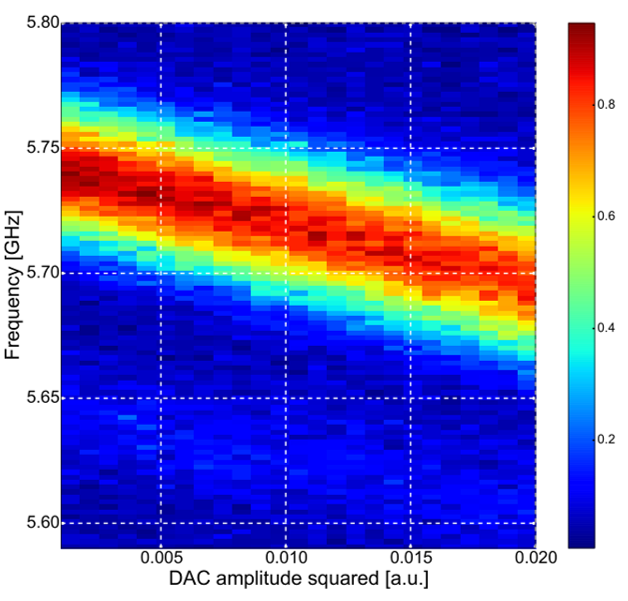

Figure in courtesy of [2] in Figure 6.4, page 147.

AC Stark shift measured via qubit detuning during measurement.

Calibration between the resonator photon drive amplitude with the steady value of $n$. One can measure this value at $\tau=100$ ns point of figure 6.3 c as we vary the amplitude of the measurement drive pulse. Therefore, the pulse sequence is similar with two differences.

1. The $\pi$-pulse is placed at a fixed $\tau$, in the steady state part of the resonator ringdown structure.
2. The resonator drive pulse amplitude is varied.

This yields a measurement of the qubit frequency as a function of resonator drive as shown in Fig. 6.4. Assuming the resonator internal energy is proportional to the square of the pulse amplitude, we have the relation:

$$\frac{\delta \omega_{01}}{2\chi}=n=mA_{in}^2$$

where $A$ is the DAC voltage amplitude. Note that the DAC amplitude here is normalized to the maximum DAC output of the AWG generator. The 2D plot above shows the dependence of the AC stark shift of the qubit with respect to the DAC signal.
The dependence of $\delta\omega_{01}$ with the DAC amplitude squared $A^{2}$ enable us to determine $m$, using the $\chi$ determined previously.  This enable us to map out the photon number $$n=mA_{in}^{2}$$ caused by the drive. Consequently, the IQ blob, which constitutes the in-phase (I) and out-of-phase (Q) DAC voltage output $A_{out}$, follows $m$. This allows convert IQ blobs in units of photons.

## Modelling the step decay time of photons in time domain

###Imported Libraries

In [ ]:
!pip install lmfit==1.2.2
!pip install PeakUtils

In [ ]:
# Imported libraries
import numpy as np #numpy 1.25
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import peakutils
import mpmath as mp
import lmfit as lm
import scipy as sp
import pandas as pd

In [ ]:
from scipy.io import loadmat, savemat  # this is the SciPy module that loads mat-files
from scipy import stats
from scipy.stats import norm
from uncertainties import ufloat
from lmfit import Model, Parameters
from lmfit.models import ExponentialModel
from scipy.stats import linregress #obtain get guess functions

Subroutine Packages

### Data Handling and Image Sizing Packages

In [ ]:
def cm_to_inch(x):
  """
  Convert cm to inch
  """
  return x/2.54

def read_csv(fname):
  """
  Analyze Data from CSV files (check if you have header)
  """
  df = pd.DataFrame(pd.read_csv(fname + '.csv', header=None))
  #column 0 - x-axis
  #column 1 - y-axis
  return df

def get_data_from_mat(filename):
    """
    Retrieve Data from .mat file

    Parameters
    ----------
    filename : string
        filename of data.

    Returns
    -------
    dict: dictionary

    """
    df = loadmat(filename)
    return df

def freq_range(x_data, x_a, x_b):
    """Equivalent of Numpy as making range in frequencies (MHz)"""
    idx_a = np.where(x_data >= x_a)[0][0] # getting the first element of min data
    idx_b = np.where(x_data <= x_b)[0][-1] # getting the last element of max data
    return x_data[idx_a:(idx_b+1)], idx_a, int(idx_b+1)

def lst_xyrange(lst_xdata, lst_ydata, x_a, x_b):
    """
    Extract a smaller list of 1D arrays of data

    Parameters
    ----------
    lst_xdata : list of 1D arrays
        list of x-data.
    lst_ydata : list of 1D arrays
        list of y-data.
    x_a : float
        lower frequency.
    x_b : float
        higher frequency.

    Returns
    -------
    Data Analysis.
    """
    lst_xdat = []
    lst_ydat = []
    n = len(lst_xdata)
    for i in range(n):
        """Get minimum and maximum range possible"""
        idx_a = np.where(lst_xdata[i] >= x_a)[0][0]
        idx_b = np.where(lst_xdata[i] <= x_b)[0][-1]
        # print(idx_a)
        # print(idx_b)
        """Append Empty array"""
        lst_xdat.append(lst_xdata[i][idx_a:idx_b])
        lst_ydat.append(lst_ydata[i][idx_a:idx_b])
    return lst_xdat, lst_ydat

def find_nearest(array, value):
    """Find index and element to an array to which its value is nearest to the
    reference value"""
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def get_mins_from_2Darray(z2D, x, par_arr, min):
  """
  Extract peak parameters per parameter in 2D array
  Input :
    z2D : 2D numpy array
      amplitude in 2D array:
      2D numpy array shape = (len(par_arr), len(x))
    x : 1D numpy array
      frequency spectrum
    par_arr : 1D numpy array
      varied parameters for analysis
    min : string
      'dip' => minimum
      'peak' => maximum
  """
  n = len(par_arr)
  par_extract = np.ones(n)
  for i in range(len(par_arr)):
    if min == 'dip':
      idx=find_nearest(array=z2D[i], value=np.amin(z2D[i]))[0]
    elif min == 'peak':
      idx=find_nearest(array=z2D[i], value=np.amax(z2D[i]))[0]
    else:
      idx=find_nearest(array=z2D[i], value=np.amax(z2D[i]))[0]
    par_extract[i] = x[idx]

    #check for accuracy
    #print(np.amax(z2D[i]))
    #print(idx)
    #print(x[idx])
  return par_extract

def detect_mins(x_arr, y_arr, string, args):
    """
    get peaks and dips above a threshold amplitude for a 1D-array using peak
    utils. Useful for getting peaks in X and Y axis. Very susceptible to noise
    unless filter functions are implemented.

    Parameters
    ----------
    x_arr : 1D numpy array
        1D data array.
    y_arr : 1D numpy array
        1D data array.
    string : 1D numpy array
        string=peaks.
        string=dips.
    args : 1D numpy array
        args[0] = threshold amplitude
        args[1] = minimum spacing
        args[2] = number of max peaks

    Returns
    -------
    min_list : list of list of values
        min_list[0] = list of indices
        min_list[1] = list of x-value floats
        min_list[2] = list of y-value floats
    """
    if string == 'peaks':
        indices = peakutils.indexes(y_arr, thres=args[0], min_dist=args[1])
        pass
    elif string=='dips':
        y_arr_mod = -1*y_arr
        indices = peakutils.indexes(y_arr, thres=np.abs(args[0]), min_dist=args[1])
    else:
        indices = []
    return indices

"""-----------------Data Retrieval from LMFit Functions---------------------"""
def info_retriv(fitpars, string):
    """
    retrieve tuple of fit parameters (nominal values and errors) from fit

    Parameters
    ----------
    fitpars : list of dictionaries
        format = [{}].
    string : TYPE
        DESCRIPTION.

    Returns
    -------
    val_1D : 1D numpy array
        Nominal Values of parameters.
    err_1D : 1D numpy array
        Stderr of parameters.

    """
    """fitpars is an array of dictionaries of values"""
    """string would be the retrieved filename of the dictionaries"""
    """For memory efficiency, slicing the variable would be better rather than
    two list comprehension"""
    val_1D = np.asarray([fitpars[i][string][0] for i in range(len(fitpars))])
    err_1D = np.asarray([fitpars[i][string][1] for i in range(len(fitpars))])
    """Output are values of both errors and 1D string"""
    return val_1D, err_1D

def dict_retriv_form(data_dic, ctrl_dic, save):
    """
    Repackage list of dictionaries to saveable dictionary

    Parameters
    ----------
    dic : dictionary
        Data from Dictionary after autofit.
    var_dic : Variable Dic
        Dictionary with variables
    save : list of strings
        save[0]='Y': save data
        save[0]='N': do not save
        save[1]='filename of .mat'

    Returns
    -------
    None.

    """

    #acquire the list of names for a dictionary
    names = list(data_dic[0].keys())

    #add control list in front of the list
    var_str = list(ctrl_dic.keys())[0]
    names.insert(0, var_str)

    #create a new dictionary of parameters
    dic_new = {names[i]: ctrl_dic[var_str] if names[i]==var_str else
               info_retriv(fitpars=data_dic, string=names[i]) for i in range(len(names))}

    #save dictionary if necessary
    if save[0]=='Y':
        savemat(file_name = save[1]+'.mat',mdict=dic_new)

    return dic_new

def conc_val_er(ar1, ar2, er1, er2):
    #Reference: https://stackoverflow.com/questions/1720421/how-do-i-concatenate-two-lists-in-python
    return [*ar1, *ar2], [*er1, *er2]

### Fitting functions for transcient rate $\kappa_{r}$ using LMFIT decay

In [ ]:
def exp_decay_func(xdata, amp, tau):
    """
    Exponential Decay function

    Parameters
    ----------
    x : TYPE
        DESCRIPTION.
    amp : TYPE
        DESCRIPTION.
    tau : TYPE
        DESCRIPTION.

    Returns
    -------
    None.
    """
    return amp*np.exp(-xdata/tau)

def exp_distort_func(xdata, amp, a_arr, tau_arr):
    """
    Tailing Decay function

    Parameters
    ----------
    x : 1D numpy array
        DESCRIPTION.
    amp_arr : 1D numpy array
        DESCRIPTION.
    tau_arr : 1D numpy array
        DESCRIPTION.

    Returns
    -------
    None.
    """
    # https://stackoverflow.com/questions/54962604/use-python-lmfit-with-a-variable-number-of-parameters-in-function
    # https://stackoverflow.com/questions/66776253/lmfit-model-for-multi-exponential-decay
    mod = amp*np.ones(len(xdata))
    for i in range(len(a_arr)):
      mod -= a_arr[i]*np.exp(-xdata/tau_arr[i])

    # the function works

    return mod

def lm_exp_decay_fit(xdata, ydata, show=['N','N']):
    """

    Fit cosine fit

    Parameters
    ----------
    xdata : TYPE
        DESCRIPTION.
    ydata : TYPE
        DESCRIPTION.
    show : list
        show[0] = show fit report
        show[1] = show fitting

    Returns
    -------
    None.

    """

    #guess function
    mod = ExponentialModel()

    #fitting function for guess
    pars = mod.guess(ydata, x=xdata)

    """Amplitude Fit with fit"""
    init = mod.eval(pars, x=xdata)
    out = mod.fit(ydata, pars, x=xdata)

    if show[0] == 'Y':
        #print out fitting report
        print(out.fit_report(min_correl =0.3))

    if show[1] == 'Y':
        #show amplitude fit
        wfig=8.6
        fig = plt.figure(constrained_layout=True, figsize=(1*cm_to_inch(wfig),
                                                    1*cm_to_inch(wfig)))
        spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig, hspace =0.05, wspace=0.1)
        ax1 = fig.add_subplot(spec[0, 0]) #photon power dependence
        ax1.plot(xdata, ydata)
        ax1.plot(xdata, init, '--', label='initial fit')
        ax1.plot(xdata, out.best_fit, '-', label='best fit')
        ax1.set_xlabel('Time (ns)')
        ax1.set_ylabel('Resonator Photons')
        ax1.legend()

        plt.show()

    """--Retrieve String from the fit function--output is x-fit and y-fit-------"""
    name = ['amplitude', 'decay']
    # strange dictionary
    out_dict_val_stderr = {name[i]: [out.params[name[i]].value,
                                    out.params[name[i]].stderr] for i in range(len(name))}

    return out.best_fit, out_dict_val_stderr

Plot of the Data. We perform fitting and overlap.



[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 30
    # variables        = 2
    chi-square         = 138.615575
    reduced chi-square = 4.95055624
    Akaike info crit   = 49.9152121
    Bayesian info crit = 52.7176069
    R-squared          = 0.99561907
[[Variables]]
    amplitude:  7894.18563 +/- 781.809524 (9.90%) (init = 5155.372)
    decay:      38.8765899 +/- 0.85274335 (2.19%) (init = 35.6268)
[[Correlations]] (unreported correlations are < 0.300)
    C(amplitude, decay) = -0.9940


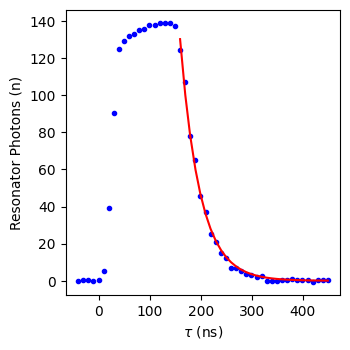

kappa = 25.7 +/- 0.6 MHz


In [ ]:
# extract df from data
fname1 = 'n_vs_tau_ns'
df1 = read_csv(fname1)
#print(df1)

# get exponential sample
i=20
df1_exp_x = df1[0][i:]
df1_exp_y = df1[1][i:]

# fitting of exponential decay
e1 = 1E-9 #convert value
yfit, dict_exp = lm_exp_decay_fit(xdata=df1_exp_x, ydata=df1_exp_y, show=['Y','N'])

wfig=8.6
fig = plt.figure(constrained_layout=True, figsize=(1*cm_to_inch(wfig),
                                                   1*cm_to_inch(wfig)))
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig, hspace =0.05, wspace=0.1)
ax1 = fig.add_subplot(spec[0, 0]) #photon power dependence

ax1.plot(df1[0].to_numpy(), df1[1].to_numpy(), 'b.', label='Data')
ax1.plot(df1_exp_x, yfit, 'r-', label='Exp Decay Fit')
ax1.set_xlabel(r'$\tau$ (ns)')
ax1.set_ylabel('Resonator Photons (n)')

plt.show()

#printing of data values
tau_ns = ufloat(dict_exp['decay'][0],dict_exp['decay'][1])
kappa_r = 1/(tau_ns*1E-9)
print('kappa = {:.1f} +/- {:.1f} MHz'.format(kappa_r.n/1E6, kappa_r.std_dev/1E6))

### Optional: Data Analysis of the Photon Rise time.

We create good fitting functions for a step response with a decay time. (good fit)

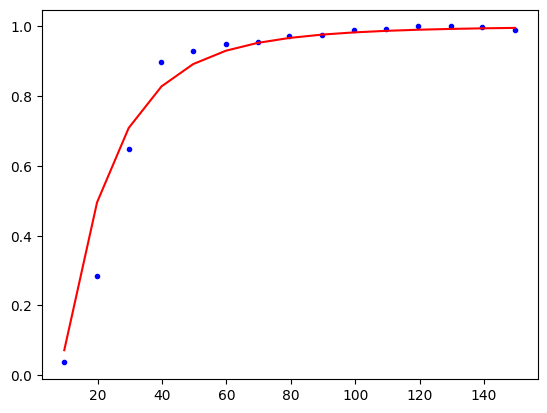

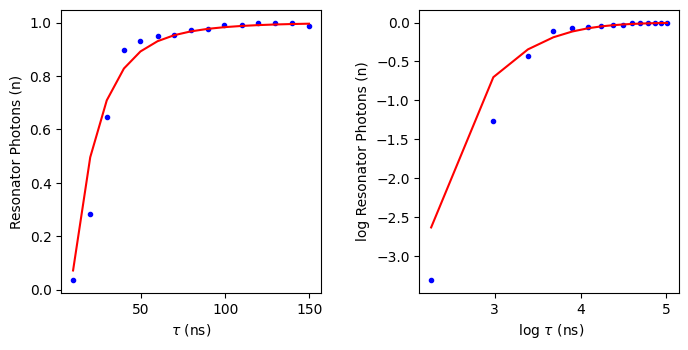

In [ ]:
# check if fitted data works
i = 20
j = 5
# yfit_grow = exp_distort_func(xdata=df1[0][j:i], amp=np.amax(df1[1]), tau=80)
x_val = df1[0][j:i].to_numpy()
y_trans = df1[1][j:i].to_numpy()/np.amax(df1[1][j:i].to_numpy())
y_test = exp_distort_func(xdata=x_val, amp=1, a_arr=np.array([1, 0.5, 0.2]),
                          tau_arr = np.array([13, 18, 38]))

plt.plot(x_val, y_trans, 'b.')
plt.plot(x_val, y_test, 'r-')
plt.show()

wfig=8.6
fig = plt.figure(constrained_layout=True, figsize=(2*cm_to_inch(wfig),
                                                   1*cm_to_inch(wfig)))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig, hspace =0.05, wspace=0.1)
ax1 = fig.add_subplot(spec[0, 0]) #photon number and time
ax2 = fig.add_subplot(spec[0, 1]) #photon number and  time in  log

ax1.plot(x_val, y_trans, 'b.', label='data')
ax1.plot(x_val, y_test, 'r-', label='fit')
ax1.set_xlabel(r'$\tau$ (ns)')
ax1.set_ylabel('Resonator Photons (n)')

ax2.plot(np.log(x_val), np.log(y_trans), 'b.', label='data')
ax2.plot(np.log(x_val), np.log(y_test), 'r-', label='fit')
ax2.set_xlabel(r' log $\tau$ (ns)')
ax2.set_ylabel('log Resonator Photons (n)')

plt.show()

For a distorted rising time of the photon accumulation in the cavity, rather than using curve fit, a minimizer should be used. This is because we don't care about the accuracy and more about getting the best fit with minimal error.

## Appendix: Accessing Transcient Data based on Brooks Foxen [3]

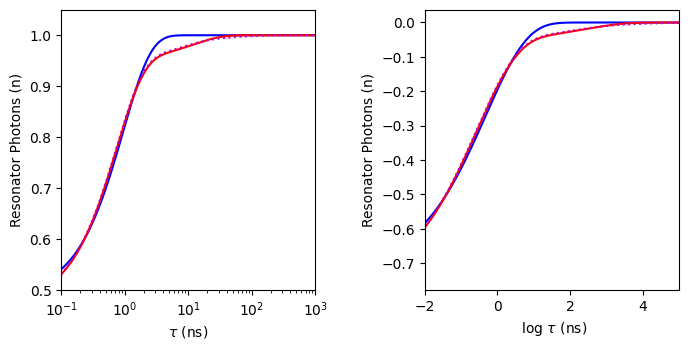

In [ ]:
xdata = np.logspace(-2, 3, 1001)
#test data based on brooks foxen

exp_func_1 = 1-0.51*np.exp(-xdata/0.95)
exp_func_2 = 1-(0.48*np.exp(-xdata/0.74) + 0.05*np.exp(-xdata/11.9))
exp_func_3 = 1-(0.48*np.exp(-xdata/0.73) + 0.04*np.exp(-xdata/7.9) + 0.01*np.exp(-xdata/53.3))

#brooks is hiding the fit

wfig=8.6
fig = plt.figure(constrained_layout=True, figsize=(2*cm_to_inch(wfig),
                                                   1*cm_to_inch(wfig)))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig, hspace =0.05, wspace=0.1)
ax1 = fig.add_subplot(spec[0, 0]) #photon number and time
ax2 = fig.add_subplot(spec[0, 1]) #photon number and  time in  log

ax1.plot(xdata, exp_func_1, 'b-', label='fit 1')
ax1.plot(xdata, exp_func_2, 'r-', label='fit 2')
ax1.plot(xdata, exp_func_3, 'm:', label='fit 3')
ax1.set_xscale('log')
ax1.set_xlim(0.1, 1000)
ax1.set_ylim(0.5, 1.05)
ax1.set_xlabel(r'$\tau$ (ns)')
ax1.set_ylabel('Resonator Photons (n)')

ax2.plot(np.log(xdata), np.log(exp_func_1), 'b-', label='fit 1')
ax2.plot(np.log(xdata), np.log(exp_func_2), 'r-', label='fit 2')
ax2.plot(np.log(xdata), np.log(exp_func_3), 'm:', label='fit 3')
ax2.set_xlim(-2, 5)
ax2.set_xlabel(r' log $\tau$ (ns)')
ax2.set_ylabel('Resonator Photons (n)')

plt.show()


For the limit of Ncrit, one can refer to [4] for the Jaynes Cumming Ladder protocol ones the blobs are calibrated.

# References
1. Krantz, P., Kjaergaard, M., Yan, F., Orlando, T. P., Gustavsson, S., & Oliver, W. D. (2019). A quantum engineer's guide to superconducting qubits. Applied Physics Reviews, 6(2), 021318. doi:10.1063/1.5089550
2. Sank, D. (2014). Fast, Accurate State Measurement in Superconducting Qubits. (PhD Thesis), University of California, Santa Barbara, Santa Barbara, California.
3. Foxen, B., Mutus, J. Y., Lucero, E., Jeffrey, E., Sank, D., Barends, R., . . . Martinis, J. M. (2019). High speed flux sampling for tunable superconducting qubits with an embedded cryogenic transducer. Superconductor Science and Technology, 32(1). doi:10.1088/1361-6668/aaf048
5. https://github.com/MostafaKhezri/JC-ladder  